In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:/EduBridge Questions/ML Questions/train.csv')
test = pd.read_csv('D:/EduBridge Questions/ML Questions/test.csv')

In [3]:
print(train.shape, '\n', test.shape)

(1700, 22) 
 (426, 21)


In [4]:
train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,142,0.000,0.000,0.007,0.000,0.0,0.0,58,0.4,9,...,136,156,0,0,148,147,149,1,0,1
1,122,0.000,0.000,0.006,0.002,0.0,0.0,27,1.4,4,...,91,144,4,0,126,120,122,6,0,1
2,129,0.005,0.003,0.001,0.000,0.0,0.0,34,1.7,0,...,78,196,10,0,137,136,137,6,0,1
3,136,0.006,0.000,0.008,0.000,0.0,0.0,45,0.8,2,...,129,158,2,0,144,143,145,1,0,1
4,144,0.000,0.000,0.006,0.000,0.0,0.0,32,1.0,0,...,122,160,1,0,150,147,149,2,1,1


In [5]:
test.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,135.0,0.011,0.002,0.004,0.0,0.0,0.0,60.0,0.9,0.0,...,39.0,124.0,163.0,1.0,0.0,148.0,143.0,146.0,6.0,0.0
1,120.0,0.008,0.000,0.005,0.0,0.0,0.0,43.0,1.4,5.0,...,106.0,50.0,156.0,8.0,0.0,129.0,129.0,130.0,11.0,1.0
2,141.0,0.000,0.002,0.003,0.0,0.0,0.0,58.0,0.5,15.0,...,23.0,130.0,153.0,1.0,0.0,144.0,143.0,145.0,1.0,0.0
3,127.0,0.000,0.000,0.006,0.0,0.0,0.0,23.0,1.5,0.0,...,91.0,107.0,198.0,6.0,0.0,135.0,134.0,135.0,4.0,-1.0
4,152.0,0.000,0.000,0.002,0.0,0.0,0.0,61.0,0.4,74.0,...,41.0,123.0,164.0,4.0,0.0,160.0,158.0,160.0,1.0,1.0


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
X = train.drop('fetal_health', axis = 1)
y = train.pop('fetal_health')

In [8]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,142,0.000,0.000,0.007,0.000,0.0,0.0,58,0.4,9,...,20,136,156,0,0,148,147,149,1,0
1,122,0.000,0.000,0.006,0.002,0.0,0.0,27,1.4,4,...,53,91,144,4,0,126,120,122,6,0
2,129,0.005,0.003,0.001,0.000,0.0,0.0,34,1.7,0,...,118,78,196,10,0,137,136,137,6,0
3,136,0.006,0.000,0.008,0.000,0.0,0.0,45,0.8,2,...,29,129,158,2,0,144,143,145,1,0
4,144,0.000,0.000,0.006,0.000,0.0,0.0,32,1.0,0,...,38,122,160,1,0,150,147,149,2,1


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: fetal_health, dtype: int64

In [10]:
y.value_counts()

1    1323
2     236
3     141
Name: fetal_health, dtype: int64

In [11]:
y.value_counts(normalize=True)

1    0.778235
2    0.138824
3    0.082941
Name: fetal_health, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [14]:
y_train.value_counts(normalize=True)

1    0.781618
2    0.137500
3    0.080882
Name: fetal_health, dtype: float64

In [15]:
y_test.value_counts(normalize=1)

1    0.764706
2    0.144118
3    0.091176
Name: fetal_health, dtype: float64

In [16]:
lda = LinearDiscriminantAnalysis()

In [17]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
lda.score(X_train, y_train)

0.8794117647058823

In [19]:
lda.score(X_test, y_test)

0.8676470588235294

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
y_train_pred = lda.predict(X_train)
y_test_pred = lda.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Test Set')

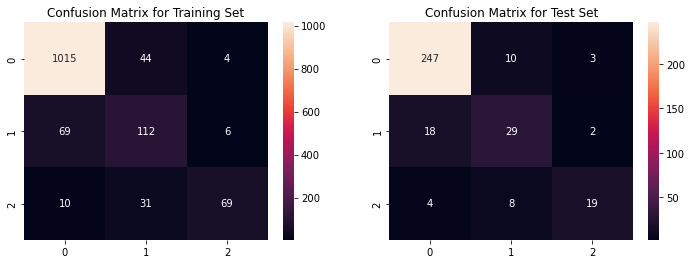

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt = 'd', ax = ax1)
ax1.set_title('Confusion Matrix for Training Set')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt = 'd', ax = ax2)
ax2.set_title('Confusion Matrix for Test Set');

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1063
           2       0.60      0.60      0.60       187
           3       0.87      0.63      0.73       110

    accuracy                           0.88      1360
   macro avg       0.80      0.73      0.76      1360
weighted avg       0.88      0.88      0.88      1360



In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       260
           2       0.62      0.59      0.60        49
           3       0.79      0.61      0.69        31

    accuracy                           0.87       340
   macro avg       0.78      0.72      0.74       340
weighted avg       0.86      0.87      0.86       340



In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
from scipy.stats import zscore

In [116]:
X_trainz = X_train.apply(zscore)
X_testz = X_test.apply(zscore)

In [76]:
knn_model = KNeighborsClassifier()

In [117]:
knn_model.fit(X_trainz, y_train)

KNeighborsClassifier()

In [118]:
knn_model.score(X_trainz, y_train)

0.9279411764705883

In [119]:
knn_model.score(X_testz, y_test)

0.9

In [120]:
ytrain_knn = knn_model.predict(X_trainz)
ytest_knn = knn_model.predict(X_testz)

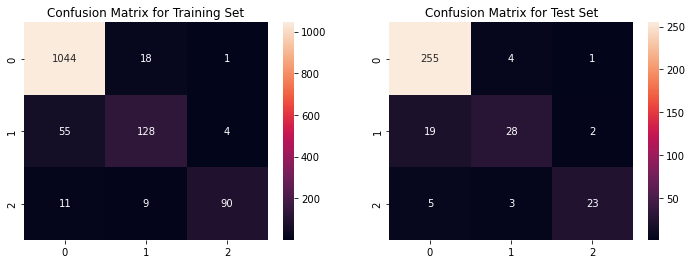

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(confusion_matrix(y_train, ytrain_knn), annot = True, fmt = 'd', ax = ax1)
ax1.set_title('Confusion Matrix for Training Set')
sns.heatmap(confusion_matrix(y_test, ytest_knn), annot = True, fmt = 'd', ax = ax2)
ax2.set_title('Confusion Matrix for Test Set');

In [111]:
print(classification_report(y_train, ytrain_knn))

              precision    recall  f1-score   support

           1       0.93      0.98      0.96      1063
           2       0.83      0.66      0.73       187
           3       0.94      0.81      0.87       110

    accuracy                           0.92      1360
   macro avg       0.90      0.82      0.85      1360
weighted avg       0.92      0.92      0.92      1360



In [112]:
print(classification_report(y_test, ytest_knn))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       260
           2       0.82      0.57      0.67        49
           3       0.86      0.81      0.83        31

    accuracy                           0.90       340
   macro avg       0.87      0.78      0.82       340
weighted avg       0.90      0.90      0.89       340



In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_model = DecisionTreeClassifier(random_state=1)

In [46]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [47]:
dt_model.score(X_train, y_train)

0.9985294117647059

In [48]:
dt_model.score(X_test, y_test)

0.9029411764705882

In [49]:
ytrain_dt_pred = dt_model.predict(X_train)
ytest_dt_pred = dt_model.predict(X_test)

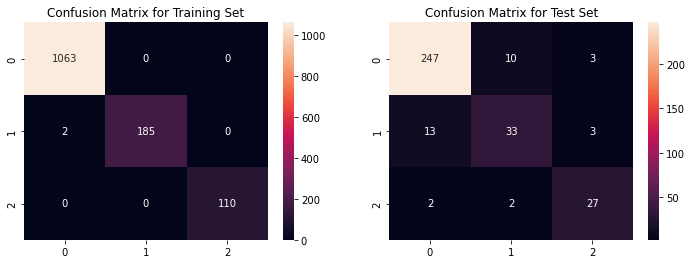

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(confusion_matrix(y_train, ytrain_dt_pred), annot = True, fmt = 'd', ax = ax1)
ax1.set_title('Confusion Matrix for Training Set')
sns.heatmap(confusion_matrix(y_test, ytest_dt_pred), annot = True, fmt = 'd', ax = ax2)
ax2.set_title('Confusion Matrix for Test Set');

In [113]:
print(classification_report(y_train, ytrain_dt_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1063
           2       1.00      0.99      0.99       187
           3       1.00      1.00      1.00       110

    accuracy                           1.00      1360
   macro avg       1.00      1.00      1.00      1360
weighted avg       1.00      1.00      1.00      1360



In [114]:
print(classification_report(y_test, ytest_dt_pred))

              precision    recall  f1-score   support

           1       0.94      0.95      0.95       260
           2       0.73      0.67      0.70        49
           3       0.82      0.87      0.84        31

    accuracy                           0.90       340
   macro avg       0.83      0.83      0.83       340
weighted avg       0.90      0.90      0.90       340



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_model = RandomForestClassifier(random_state=1, max_depth=10)

In [106]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [107]:
rf_model.score(X_train, y_train)

0.9941176470588236

In [108]:
rf_model.score(X_test, y_test)

0.9441176470588235

In [37]:
ytrain_rf_pred = rf_model.predict(X_train)
ytest_rf_pred = rf_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Test Set')

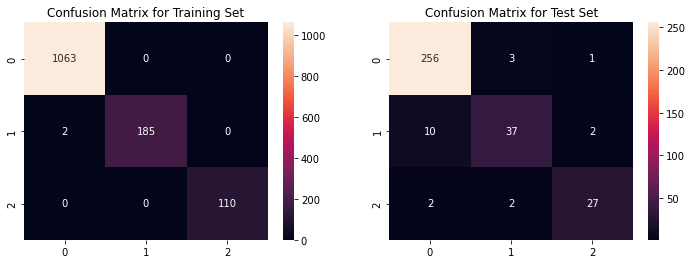

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.heatmap(confusion_matrix(y_train, ytrain_rf_pred), annot = True, fmt = 'd', ax = ax1)
ax1.set_title('Confusion Matrix for Training Set')
sns.heatmap(confusion_matrix(y_test, ytest_rf_pred), annot = True, fmt = 'd', ax = ax2)
ax2.set_title('Confusion Matrix for Test Set');

In [39]:
print(classification_report(y_train, ytrain_rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1063
           2       1.00      0.99      0.99       187
           3       1.00      1.00      1.00       110

    accuracy                           1.00      1360
   macro avg       1.00      1.00      1.00      1360
weighted avg       1.00      1.00      1.00      1360



In [40]:
print(classification_report(y_test, ytest_rf_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       260
           2       0.88      0.76      0.81        49
           3       0.90      0.87      0.89        31

    accuracy                           0.94       340
   macro avg       0.91      0.87      0.89       340
weighted avg       0.94      0.94      0.94       340



In [122]:
rf_test = rf_model.predict(test)

In [123]:
rf_model.score(test, rf_test)

1.0

In [128]:
rf_test = pd.DataFrame(rf_test, columns=['fetal_health'])

In [129]:
rf_test.to_csv('fetal_health.csv')